# [Memology](https://github.com/DmitrySerg/memology) - DataScience & Memes

![](http://orig07.deviantart.net/3e62/f/2015/267/4/1/meme_team_logo_png_smol_by_kuiwi-d9ass0h.png)

## Загружаем основные библиотеки

In [1]:
import pandas as pd             # датафреймы и операции с данными
import numpy as np              # математические операции, векторные преобразования и линал
import matplotlib.pyplot as plt # очень годные графики
%matplotlib inline              
plt.style.use('ggplot')         # используем красивый стиль ггплота
from pylab import rcParams      # устанавливаем размер графиков 
rcParams['figure.figsize'] = 6, 6

In [2]:
import warnings
warnings.filterwarnings("ignore")

При помощи метода read_csv читаем наши данные

In [3]:
memes = pd.read_csv('/Users/dmitrys/Desktop/DataProjects/KnowYourMemes/Memes_38.csv')

Базовые сведения о датасетике

In [4]:
memes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1477 entries, 0 to 1476
Data columns (total 11 columns):
Unnamed: 0    1477 non-null int64
name          1477 non-null object
added         1477 non-null object
views         1477 non-null int64
comments      1477 non-null object
status        1477 non-null object
year          1477 non-null object
tags          1477 non-null object
about         1066 non-null object
origin        784 non-null object
spread        92 non-null object
dtypes: int64(2), object(9)
memory usage: 127.0+ KB


Посмотрим на число пропущенных значений

In [5]:
memes.isnull().sum()

Unnamed: 0       0
name             0
added            0
views            0
comments         0
status           0
year             0
tags             0
about          411
origin         693
spread        1385
dtype: int64

In [6]:
memes.head(2)

,Unnamed: 0,name,added,views,comments,status,year,tags,about,origin,spread
0,0,"""Pen Pineapple Apple Pen""","Sep 28, 2016 at 12:29PM EDT",24986,31,Submission,Music,YouTube,“Pen Pineapple Apple Pen” (Japanese: ペンパイナッポーア...,"On August 25th, 2016, the music video was rele...",NaN
1,1,Barack Obama In Conversation With Leonardo DiC...,"Sep 28, 2016 at 12:23PM EDT",8667,20,Submission,2016,"obama, dicaprio, climate change, caption, twitter",Barack Obama In Conversation With Leondardo Di...,"On September 25th, 2016, the @WhiteHouse[1] Tw...",NaN


In [7]:
memes.tail(2)

,Unnamed: 0,name,added,views,comments,status,year,tags,about,origin,spread
1475,1475,James Deen Rape Allegations,"Dec 01, 2015 at 04:50PM EST",63864,139,Submission,Crime &amp; Justice,Twitter,NaN,NaN,NaN
1476,1476,The Meteorologist Dress,"Dec 01, 2015 at 11:42AM EST",5406,15,Submission,2015,"amazon, facebook, news, weather, dress, clothi...",The Meteorologist Dress refers to a women’s ga...,"On November 21st, 2015, meteorologist Jennifer...",NaN


In [8]:
memes.columns

Index([u'Unnamed: 0', u'name', u'added', u'views', u'comments', u'status',
       u'year', u'tags', u'about', u'origin', u'spread'],
      dtype='object')

Удалим ненужный столбец `Unnamed: 0`, параметром axis выбираем - будем дропать строку или столбец, inplace - чтобы наши изменения сохранились

In [9]:
memes.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [10]:
memes.name.value_counts()[:10]

Clown Sightings                                        33
"Pen Pineapple Apple Pen"                              33
Sad Bernie Sanders                                     33
Barack Obama In Conversation With Leonardo DiCaprio    33
Nazi Pepe Controversy                                  33
"Please don't write something snarky"                  33
Adventure Time                                         32
We are number one                                       2
TheKAIRI78                                              1
Misha / Mishovy silenosti                               1
Name: name, dtype: int64

In [11]:
memes = memes.drop_duplicates(['name'])

In [12]:
memes.shape

(1253, 10)

In [13]:
memes.head(2)

,name,added,views,comments,status,year,tags,about,origin,spread
0,"""Pen Pineapple Apple Pen""","Sep 28, 2016 at 12:29PM EDT",24986,31,Submission,Music,YouTube,“Pen Pineapple Apple Pen” (Japanese: ペンパイナッポーア...,"On August 25th, 2016, the music video was rele...",NaN
1,Barack Obama In Conversation With Leonardo DiC...,"Sep 28, 2016 at 12:23PM EDT",8667,20,Submission,2016,"obama, dicaprio, climate change, caption, twitter",Barack Obama In Conversation With Leondardo Di...,"On September 25th, 2016, the @WhiteHouse[1] Tw...",NaN


## Посмотрим поближе на переменные

## Время добавления

In [14]:
memes.added[0:10]

0    Sep 28, 2016 at 12:29PM EDT
1    Sep 28, 2016 at 12:23PM EDT
2    Sep 27, 2016 at 12:38PM EDT
3    Sep 28, 2016 at 12:32PM EDT
4    Sep 09, 2016 at 12:50PM EDT
5    Sep 27, 2016 at 12:33PM EDT
6    May 10, 2010 at 04:27PM EDT
7    Oct 01, 2016 at 04:03PM EDT
8    Sep 30, 2016 at 09:57PM EDT
9    Sep 30, 2016 at 02:59PM EDT
Name: added, dtype: object

In [15]:
pd.to_datetime(memes.added[0])

Timestamp('2016-09-28 12:29:00')

### Перегоним наши текстовые даты в понятный питону формат Timestamp

In [16]:
def getTimestamp(date):
    return pd.to_datetime(date)

In [17]:
memes['Timestamp'] = memes.added.apply(lambda x: getTimestamp(x))

### Чем удобен timestamp - теперь мы можем из него получать год, месяц, день, час, дальше по вкусу

In [18]:
memes.loc[0]

name                                 "Pen Pineapple Apple Pen"
added                              Sep 28, 2016 at 12:29PM EDT
views                                                    24986
comments                                                    31
status                                              Submission
year                                                     Music
tags                                                   YouTube
about        “Pen Pineapple Apple Pen” (Japanese: ペンパイナッポーア...
origin       On August 25th, 2016, the music video was rele...
spread                                                     NaN
Timestamp                                  2016-09-28 12:29:00
Name: 0, dtype: object

In [19]:
memes.loc[0, 'Timestamp']

Timestamp('2016-09-28 12:29:00')

In [20]:
print(memes.loc[0, 'Timestamp'].year)
print(memes.loc[0, 'Timestamp'].month)
print(memes.loc[0, 'Timestamp'].day)
print(memes.loc[0, 'Timestamp'].hour)

2016
9
28
12


## Создадим соответствующие переменные

In [21]:
memes['Year'] = memes.Timestamp.apply(lambda x: x.year)
memes['Month'] = memes.Timestamp.apply(lambda x: x.month)
memes['Day'] = memes.Timestamp.apply(lambda x: x.day)
memes['Hour'] = memes.Timestamp.apply(lambda x: x.hour)
memes['Weekday'] = memes.Timestamp.apply(lambda x: x.weekday())

In [22]:
memes['days_from_creation'] = (memes.Timestamp.max() - memes.Timestamp)/np.timedelta64(1, 'D')

In [23]:
memes.Timestamp.min().year, memes.Timestamp.max().year

(2010, 2016)

## Посмотрим на гистограмки

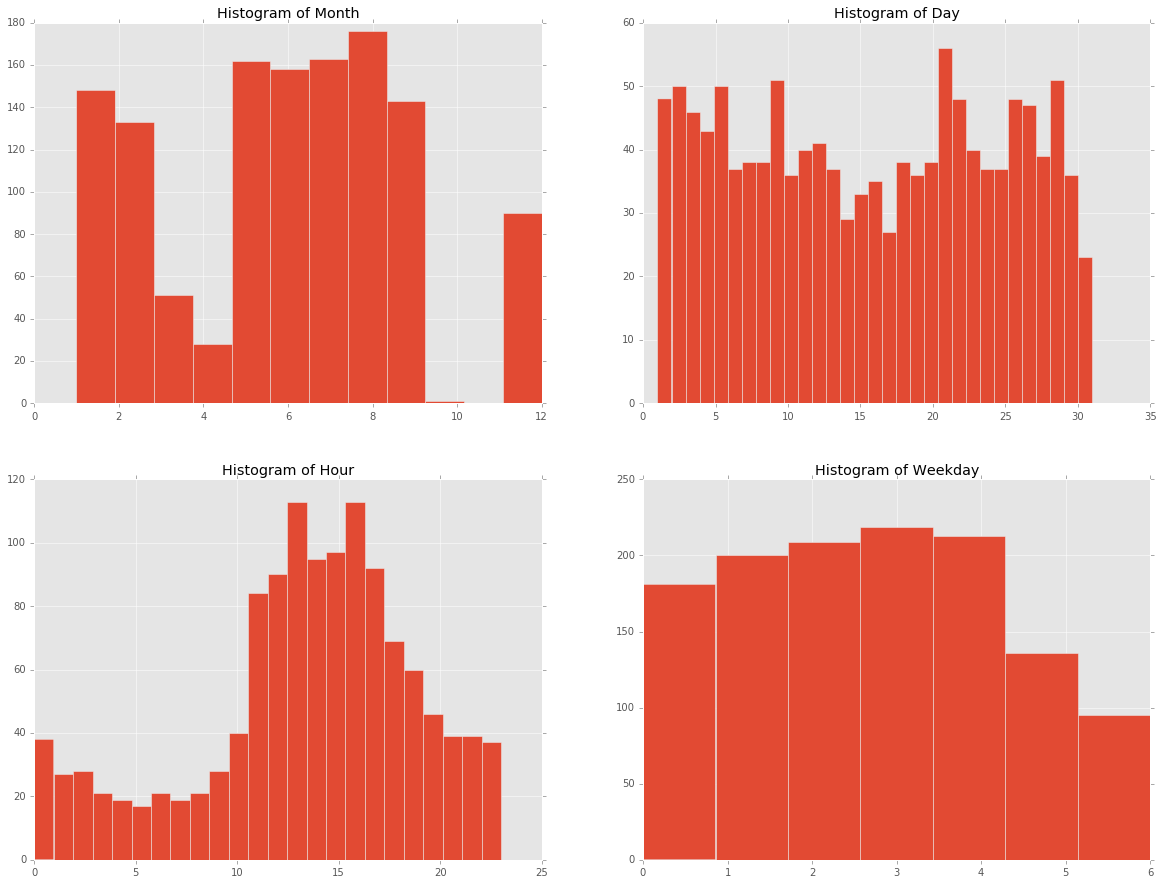

In [24]:
index =0 
f, axarr = plt.subplots(2, 2, figsize=(20,15))
times = ['Month', 'Day', 'Hour', 'Weekday']
bins = [12, 31, 24, 7]
index = 0
for i in range(2):
    for j in range(2):
        axarr[i, j].hist(memes[times[index]], bins = bins[index])
        axarr[i, j].set_title('Histogram of {}'.format(times[index]))
        index += 1

f.subplots_adjust(hspace=0.2)

# Просмотры

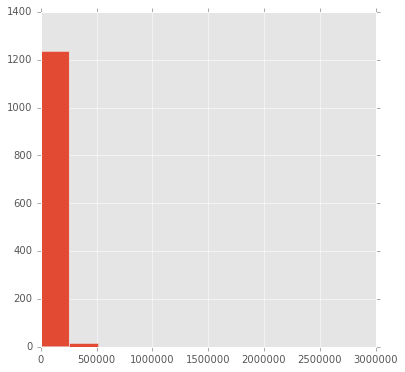

In [25]:
memes.views.hist(bins=10)

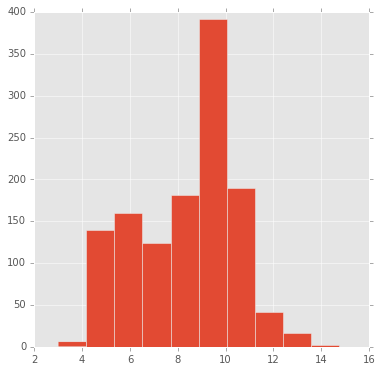

In [26]:
memes.views[memes.views>0].apply(np.log).hist(bins=10)

In [27]:
memes['average_views'] = memes.views/memes.days_from_creation

# Посмотрим на самые популярные

In [28]:
sorted_df = memes.sort_values(by='average_views', ascending=False)
for i in (sorted_df.index.tolist()[:7]):
    print('\nНазвание: ')
    print(sorted_df.loc[i,'name'])
    print(round(sorted_df.loc[i,'average_views']))
    print('==================')


Название: 
Describe Yourself in 3 Fictional Characters
31561.0

Название: 
Harambe the Gorilla
16687.0

Название: 
Dat Boi
16410.0

Название: 
Hugh Mungus
12579.0

Название: 
Roof Koreans
8731.0

Название: 
"Pen Pineapple Apple Pen"
7936.0

Название: 
I'm Rick Harrison and This Is My Pawn Shop
6136.0


# Комментарии

In [29]:
memes.comments[~memes.comments.apply(lambda x: x.isdigit())][:10]

46     1 Comment">\n<a href="/memes/we-are-number-one...
63     1 Comment">\n<a href="/memes/subcultures/offic...
76     1 Comment">\n<a href="/memes/events/the-kebab-...
167    1 Comment">\n<a href="/memes/dipp#comments" re...
174    1 Comment">\n<a href="/memes/the-otp-and-the-t...
210    1 Comment">\n<a href="/memes/people/redlight#c...
254    1 Comment">\n<a href="/memes/subcultures/reser...
255    1 Comment">\n<a href="/memes/subcultures/jacka...
274    1 Comment">\n<a href="/memes/sites/mighty-car-...
276    1 Comment">\n<a href="/memes/keemstars-party#c...
Name: comments, dtype: object

In [30]:
memes.comments[~memes.comments.apply(lambda x: x.isdigit())] = 1

In [31]:
memes.comments = memes.comments.astype(int)

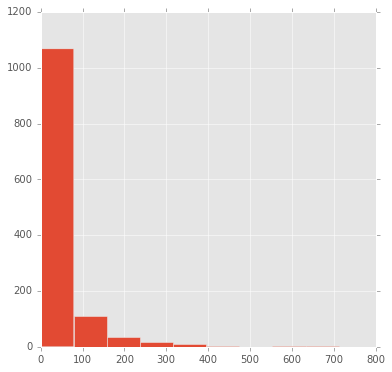

In [32]:
memes.comments.hist()

In [33]:
memes['average_comments'] = memes.comments/memes.days_from_creation

In [34]:
sorted_df = memes.sort_values(by='average_comments', ascending=False)
for i in (sorted_df.index.tolist()[:7]):
    print('\nНазвание: ')
    print(sorted_df.loc[i,'name'])
    print(round(sorted_df.loc[i,'average_comments']))
    print('==================')


Название: 
Emoji Spells
43.0

Название: 
Name a More Iconic Duo
43.0

Название: 
Google/Clinton Conspiracy
32.0

Название: 
Roof Koreans
31.0

Название: 
Bowl of M&amp;Ms
28.0

Название: 
2016 United States Presidential Election Debates
26.0

Название: 
YouTube Heroes Controversy
23.0


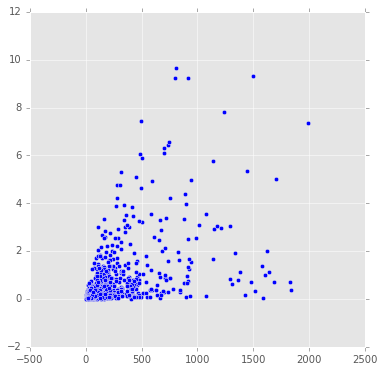

In [35]:
condition = (memes.average_views<2000)&(memes.average_comments<10)
plt.scatter(memes.average_views[condition], memes.average_comments[condition])
plt.show()

In [36]:
def is_outlier(value, column, data, minimum_percentile, maximum_percentile):
    maximum = np.percentile(data[column], maximum_percentile)
    minimum = np.percentile(data[column], minimum_percentile)
    return minimum <= value <= maximum

def exclude_outliers(column, data, minimum_percentile = 5, maximum_percentile = 95):
    outliers_list = data[column].apply(lambda x: is_outlier(x, column, data, minimum_percentile, maximum_percentile))
    data = data[outliers_list]
    return data

In [37]:
memes_cleaned = exclude_outliers('views', memes, maximum_percentile=80)
memes_cleaned = exclude_outliers('comments', memes_cleaned)

In [38]:
len(memes), len(memes_cleaned)

(1253, 894)

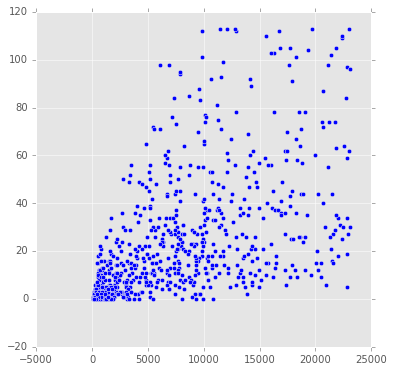

In [39]:
plt.scatter(memes_cleaned.views, memes_cleaned.comments)
plt.show()

# Tags

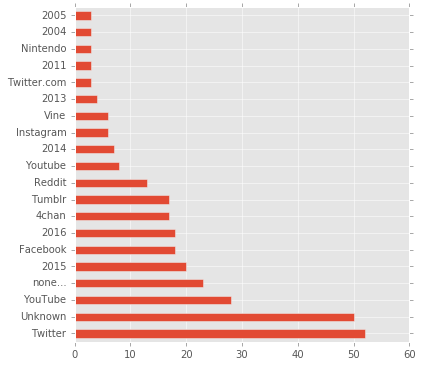

In [40]:
memes.tags.value_counts()[:20].plot(kind='barh')

![](https://lh3.googleusercontent.com/2lV4Nm6oa9_hY2t-9tBbo3RAuEzcraalogZT0oPDmBqic4tWXliMP_PPWMfG4nnr0vxF=h1264)